# Log Normal Distribution

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
sns.set_context('talk')

In [79]:
plt.style.use('fivethirtyeight')


In [6]:
%config InlineBackend.figure_format = 'retina'


### Normal Distribution (by hand)

In [74]:
x = np.arange(-4, 6, 0.1)

In [75]:
def gaussian(x, loc=1, scale=1):
    
    coef = 1 / (np.sqrt(2 * np.pi))
    
    inner = -0.5 * ((x - loc) / scale) ** 2
    
    return coef * np.exp(inner)

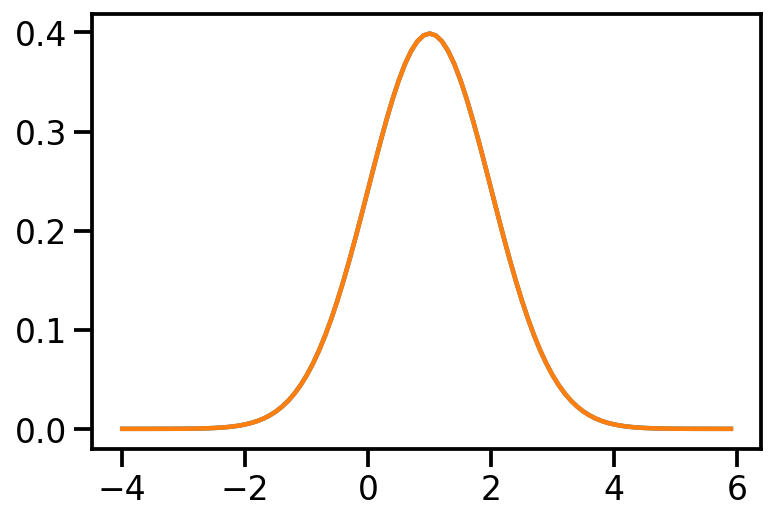

In [76]:
plt.plot(x, gaussian(x))
plt.plot(x, stats.norm.pdf(x, loc=1))

Text(0.5, 1.0, 'Normal PDF on space $X$')

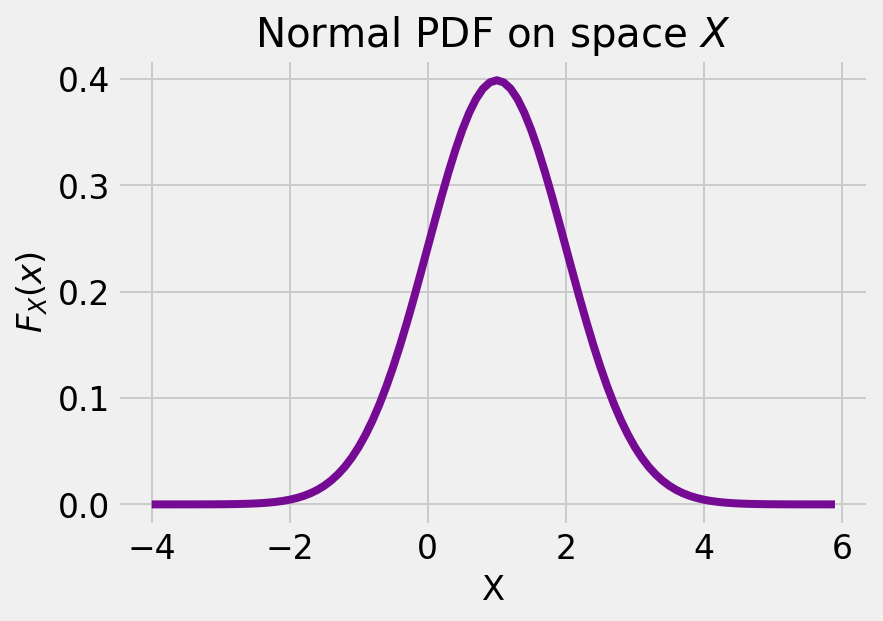

In [98]:
plt.plot(x, gaussian(x), color='#760b93')
plt.xlabel('X')
plt.ylabel('$F_X(x)$')
plt.title('Normal PDF on space $X$')

### Transform via $(1 + e^{-x})^{-1}$

In [10]:
def transform(x):
    return (1 + np.exp(-x)) ** (-1)

In [86]:
def experiment(interval_size=0.5):
    x = np.arange(-10, 10, interval_size)
    y = np.zeros(len(x))
    
    plt.figure(figsize=(10, 0.5))
    plt.ylim(-0.02, 0.02)
    plt.scatter(x, y, alpha=0.8, marker='|', color='#760b93')
    plt.title(f'X (interval size: {interval_size})')
    plt.tick_params(axis='y', left=False, labelleft=False)
    
    plt.figure(figsize=(10, 0.5))
    plt.ylim(-0.02, 0.02)
    plt.scatter(transform(x), y, alpha=0.6, marker='|', color='#760b93')
    plt.title('Y')
    plt.tick_params(axis='y', left=False, labelleft=False)
    
    plt.show()
    
    print('_________________________________________________________________________________')
    print('\n')

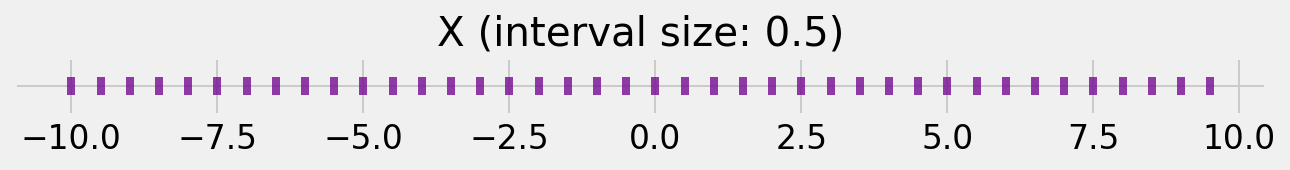

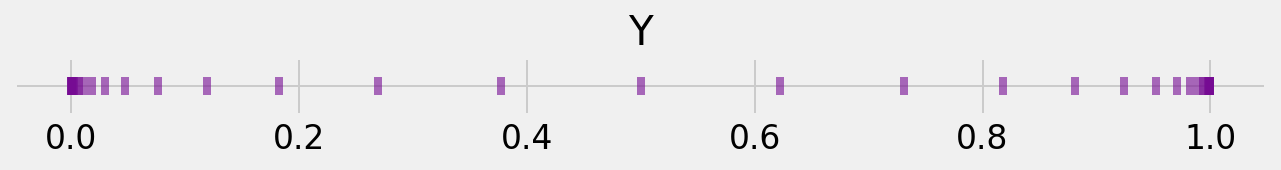

_________________________________________________________________________________




In [87]:
experiment()

Text(0.5, 1.0, 'Transform: $Y = (1 + e^{-x})^{-1}$')

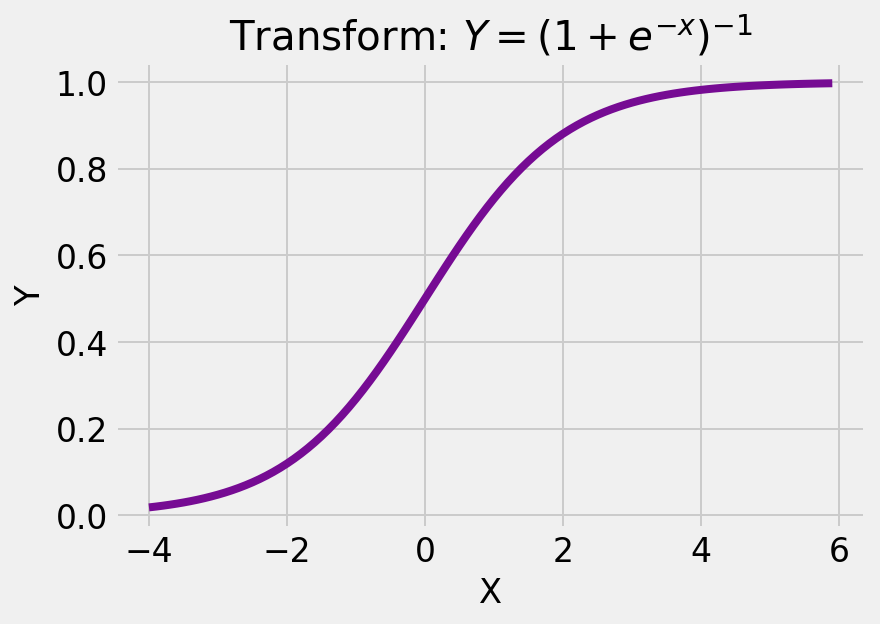

In [91]:
plt.plot(x, transform(x), color='#760b93')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Transform: $Y = (1 + e^{-x})^{-1}$')

In [26]:
def inverse_transform(y):
    return -np.log((1 / y) - 1)

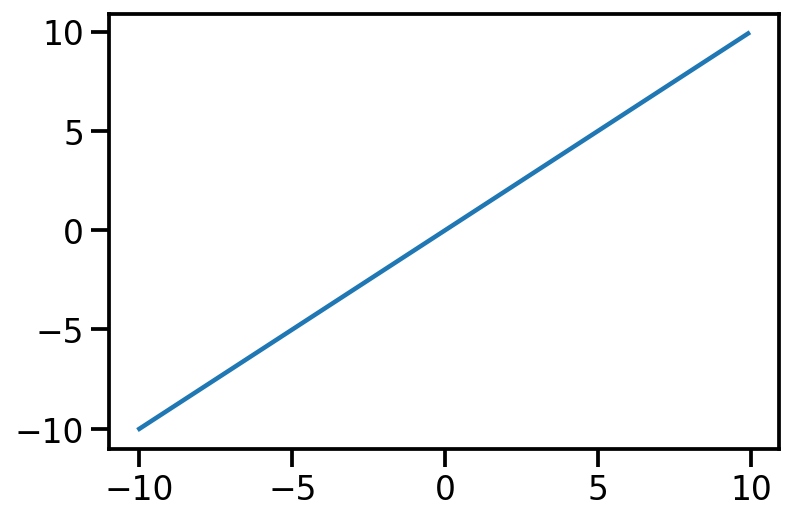

In [27]:
plt.plot(x, inverse_transform(transform(x)))

In [66]:
def derivative_of_x_wrt_y(y):
    return np.abs((1 / (y - y**2)))

In [69]:
def transformed_normal(y):
    
    # Compute density of y via getting density of x via inverse transform
    x = inverse_transform(y)
    density_x = gaussian(x)
    
    # Compute jacobian (how x changes with y) as a function of y
    jacobian_y = derivative_of_x_wrt_y(y)
    
    return density_x * jacobian_y 

Text(0.5, 1.0, 'Transformed normal PDF, on space Y')

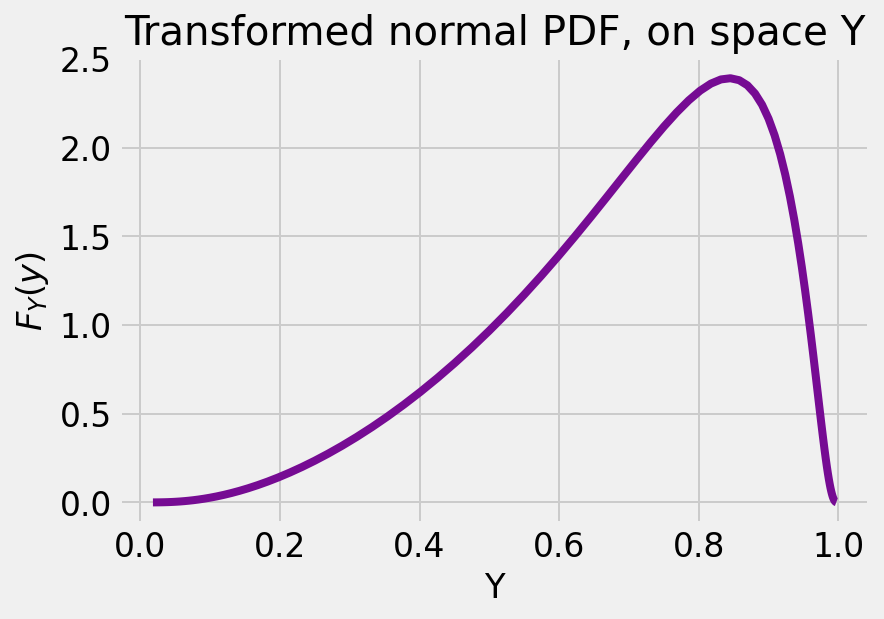

In [95]:
plt.plot(transform(x), transformed_normal(transform(x)), color='#760b93')

plt.xlabel('Y')
plt.ylabel('$F_Y(y)$')
plt.title('Transformed normal PDF, on space Y')